# PS3#03 - Flavors of Gradient Descent

<div style="text-align: right;font-size: 0.8em">Last updated: 2022-12-06</div>

This notebook requires `numpy`, `matplotlib`, and `pandas` to run. If the following cell raises an error, install them first.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable, Tuple  # for type annotations
np.random.seed(1)

In [2]:
N = 100

X_all = np.random.rand(N)

## Question d.i - Plotting the error functions

The following two functions compute the values of $L_1(w, X)$ and of $L_2(w, X)$:

In [3]:
# These functions are optimized for 2D plotting
# Refer to the problem set for a simple expression
def l1(w, X=X_all):
    w = np.atleast_1d(w)
    w0 = w[..., :1]
    w1 = w[..., 1:]
    new_shape = tuple([1]*(w.ndim - 1) + [-1])
    X_reshaped = X.reshape(new_shape)
    return (
        ((X_reshaped)**2 - w0 - w1*X_reshaped)**2
    ).sum(axis=-1) / N

def l2(w, X=X_all):
    w = np.atleast_1d(w)
    w0 = w[..., :1]
    w1 = w[..., 1:]
    new_shape = tuple([1]*(w.ndim - 1) + [-1])
    X_reshaped = X.reshape(new_shape)
    return (
        (
            X_reshaped - np.sin(w0/2 + w1/2*X_reshaped)
        )**2
    ).sum(axis=-1) / N

Run the following cell to plot the two functions:

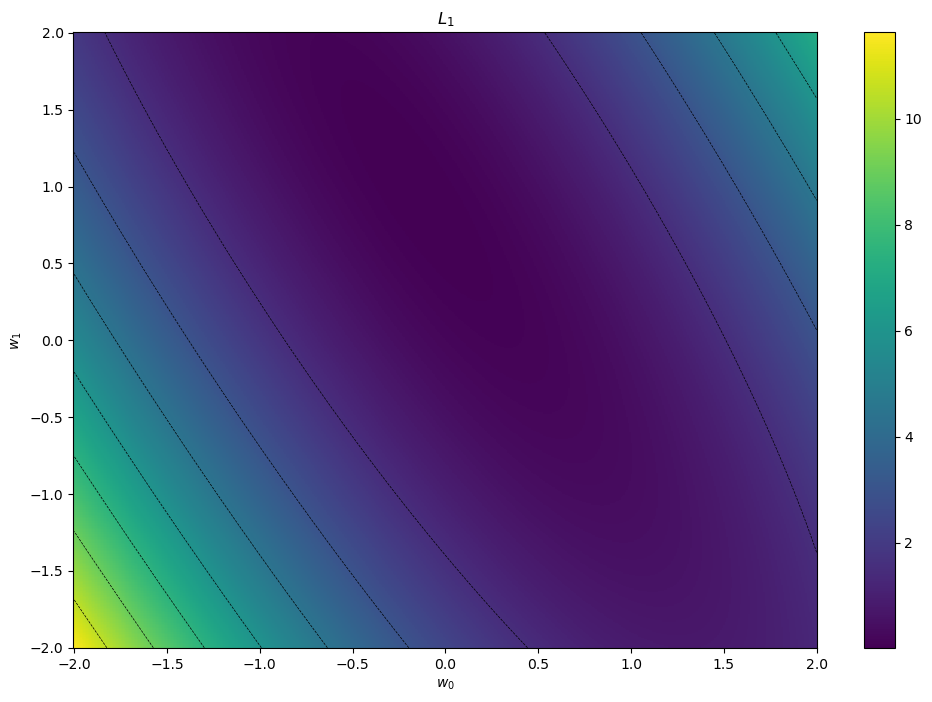

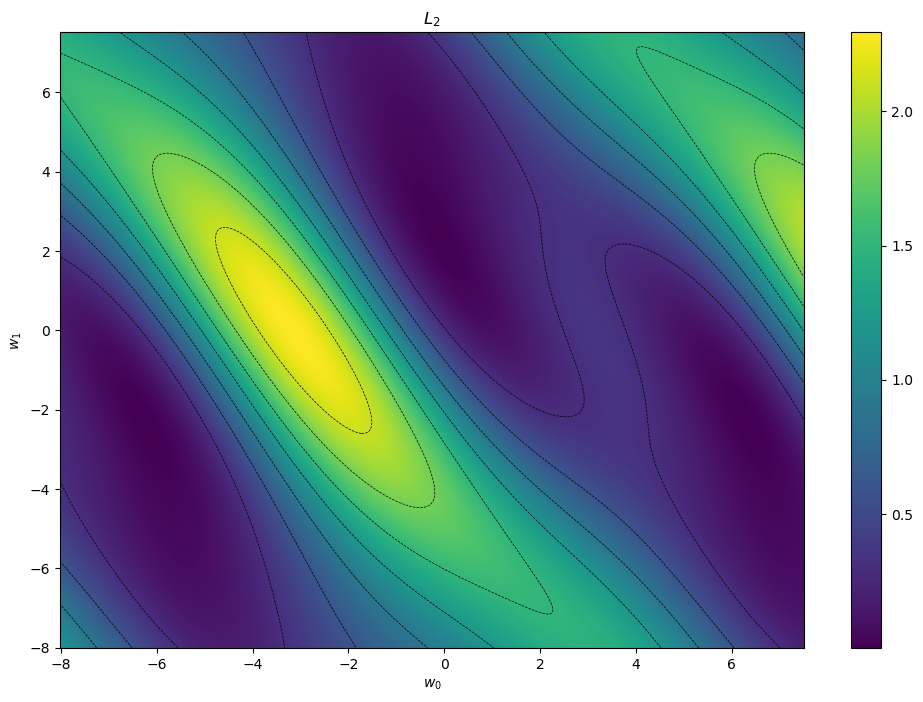

In [4]:
def plot_loss(loss_number, show=True):
    if loss_number == 1:
        loss_function = l1
        w0_range = np.linspace(-2, 2, 500)
        w1_range = np.linspace(-2, 2, 500)
    else:
        loss_function = l2
        w0_range = np.linspace(-8, 7.5, 500)
        w1_range = np.linspace(-8, 7.5, 500)
    w0, w1 = np.meshgrid(w0_range, w1_range)
    w = np.dstack((w0, w1))
    loss = loss_function(w)
    fig = plt.figure(figsize=(12, 8))
    plt.pcolor(w0, w1, loss, shading='auto')
    plt.colorbar()
    plt.contour(w0, w1, loss, colors='black', linewidths=0.5, linestyles='dashed')
    plt.xlabel(r'$w_0$')
    plt.ylabel(r'$w_1$')
    plt.title(r'$L_{}$'.format(loss_number))
    if show:
        plt.show()
    else:
        return fig

plot_loss(1)
plot_loss(2)

## Question ii- Gradients computation

Compute the gradient of each function.

In [5]:
def l1_grad(w: np.ndarray, X:np.ndarray) -> np.ndarray:
    """
    Compute the gradient of the function L_1.
    Args:
        w: array of shape (2,) of the weights where to compute the gradient
        X: array of shape (N,) of data points to use.
    
    Returns:
        grad: array of shape (2,)
    """
    ### BEGIN SOLUTION
    X = X.reshape((1, -1))
    X_ = np.vstack((np.ones_like(X), X))
    w = w.reshape((-1, 1))
    grad = -2 * (X**2 - w * X_).mean(axis = 1)
    
    return grad
    ### END SOLUTION

def l2_grad(w: np.ndarray, X:np.ndarray) -> np.ndarray:
    """
    Compute the gradient of the function L_2.
    Args:
        w: array of shape (2,) of the weights where to compute the gradient
        X: array of shape (N,) of data points to use.
    
    Returns:
        grad: array of shape (2,)
    """
    ### BEGIN SOLUTION
    X = X.reshape((1, -1))
    X_ = np.vstack((np.ones_like(X), X))
    w = w.reshape((-1, 1))
    grad = - (X_ * np.cos(w.T @ X_/2) * (X - np.sin(w.T @ X_/2))).mean(axis = 1)
    
    return grad
    ### END SOLUTION

## Question iii - Gradient descent implementation

Fill in the functions `gd_step`, `sgd_step`, and `mgd_step`, which perform a gradient step from `w` using the gradient function `gradient_function`. They should all return a tuple `(w, grad)`.

_Hint_: `gradient_function` contains the appropriate function to compute the gradient. It is either `l1_grad` or `l2_grad`, and you can call it as `gradient_function(w, X)` where `X` is well-chosen and depends on which gradient descent variant you are implementing.

In [6]:
def gd_step(w: np.ndarray, gradient_function: Callable, learning_rate: float, *args, **kwargs) -> Tuple[np.ndarray, np.ndarray]:
    """
    Performs a standard gradient step from w according to gradient_function.
    Args:
        w: array of shape (2,), starting point of the gradient step
        gradient_function: Callable of the gradient function. Will be either l1_grad or l2_grad.
            Can be called with gradient_function(w, X), where X is the data to use.
        learning_rate: the learning rate
        args, kwargs: unused, only for compatibility with mgd_step.
    Returns:
        w_: the new value of the weights after the step
        grad: the value of the gradient used for the step
    """
    ### BEGIN SOLUTION
    grad = gradient_function(w, X_all)
    w = w - learning_rate * grad
    return w, grad
    ### END SOLUTION

def sgd_step(w: np.ndarray, gradient_function: Callable, learning_rate: float, *args, **kwargs) -> Tuple[np.ndarray, np.ndarray]:
    """
    Performs a stochastic gradient step from w according to gradient_function.
    Args:
        w: array of shape (2,), starting point of the gradient step
        gradient_function: Callable of the gradient function. Will be either l1_grad or l2_grad.
            Can be called with gradient_function(w, X), where X is the data to use.
        learning_rate: the learning rate
        args, kwargs: unused, only for compatibility with mgd_step.
    Returns:
        w_: the new value of the weights after the step
        grad: the value of the gradient used for the step
    """
    ### BEGIN SOLUTION
    i = np.random.randint(X_all.shape[0])
    grad = gradient_function(w, np.atleast_1d(X_all[i]))
    w = w - learning_rate * grad
    return w, grad
    ### END SOLUTION

def mgd_step(w: np.ndarray, gradient_function: Callable, learning_rate: float, batch_size: int) -> Tuple[np.ndarray, np.ndarray]:
    """
    Performs a minibatch gradient step from w according to gradient_function.
    Args:
        w: array of shape (2,), starting point of the gradient step
        gradient_function: Callable of the gradient function. Will be either l1_grad or l2_grad.
            Can be called with gradient_function(w, X), where X is the data to use.
        learning_rate: the learning rate
        batch_size: size of the minibatch
    Returns:
        w_: the new value of the weights after the step
        grad: the value of the gradient used for the step
    """
    ### BEGIN SOLUTION
    inds = np.arange(X_all.shape[0])
    batch_inds = np.random.choice(inds, size=batch_size)
    X_batch = X_all[batch_inds]
    grad = gradient_function(w, np.atleast_1d(X_batch))
    w = w - learning_rate * grad
    return w, grad
    ### END SOLUTION

## Question iv - Plotting gradient descent iterations

The following function performs $50$ steps of the chosen optimization method on the chosen loss function from the initial point $(1.5, 1.5)^\top$ (for $L_1$) or $(-1.4, -3)^\top$ (for $L_2$).

In [7]:
def optimize_and_plot(loss_number, optimizer_step, n_runs=1):
    if loss_number == 1:
        loss_gradient = l1_grad
        w0 = np.array([1.5, 1.5])
        learning_rate = 0.1
    else:
        loss_gradient = l2_grad
        w0 = np.array([-1.4, -3])
        learning_rate = 2.

    optimizer_name = optimizer_step.__name__.split('.')[-1]
    N_steps = 50
    batch_size = 10
    
    # Optimization
    ws = np.ones((n_runs, N_steps+1, 2), dtype=float)*w0
    grads = np.zeros((n_runs, N_steps, 2), dtype=float)
    for run in range(n_runs):
        w = w0
        for n in range(1, N_steps+1):
            w, grad = optimizer_step(w, loss_gradient, learning_rate, batch_size=batch_size)
            ws[run, n, :] = w
            grads[run, n-1, :] = grad

    # Plotting
    plot_loss(loss_number, show=False)
    for run in range(n_runs):
        w0s = ws[run, :, 0]
        w1s = ws[run, :, 1]
        plt.plot(w0s, w1s, '-', linewidth=0.5, label=f'Run {run+1}')
    plt.title(r'$L_{}$ - {}'.format(loss_number, optimizer_name))
    plt.legend(loc='best')
    plt.show()
    return ws


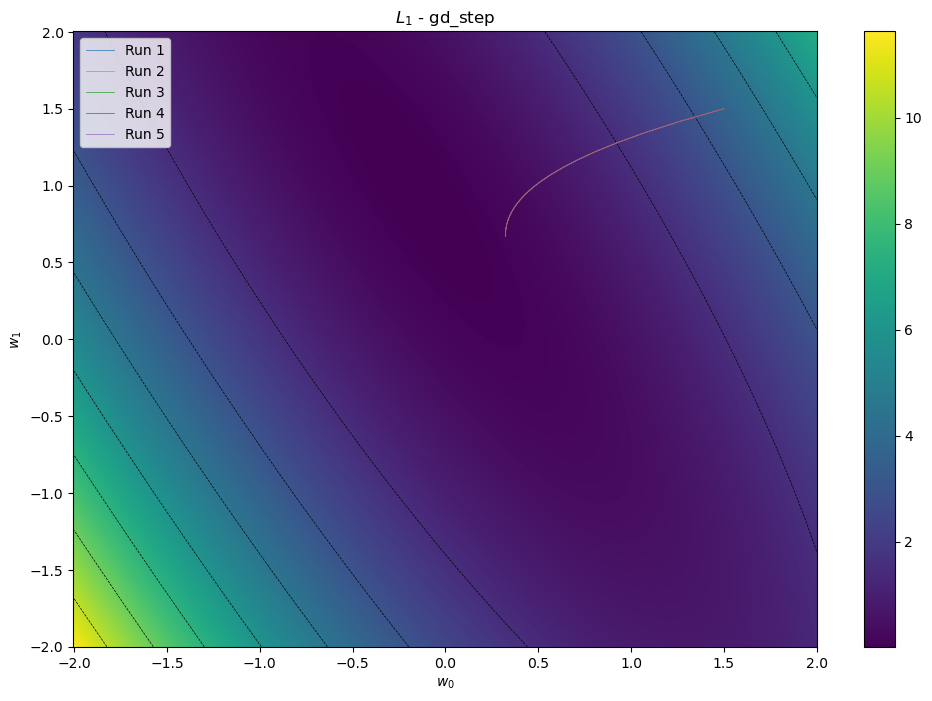

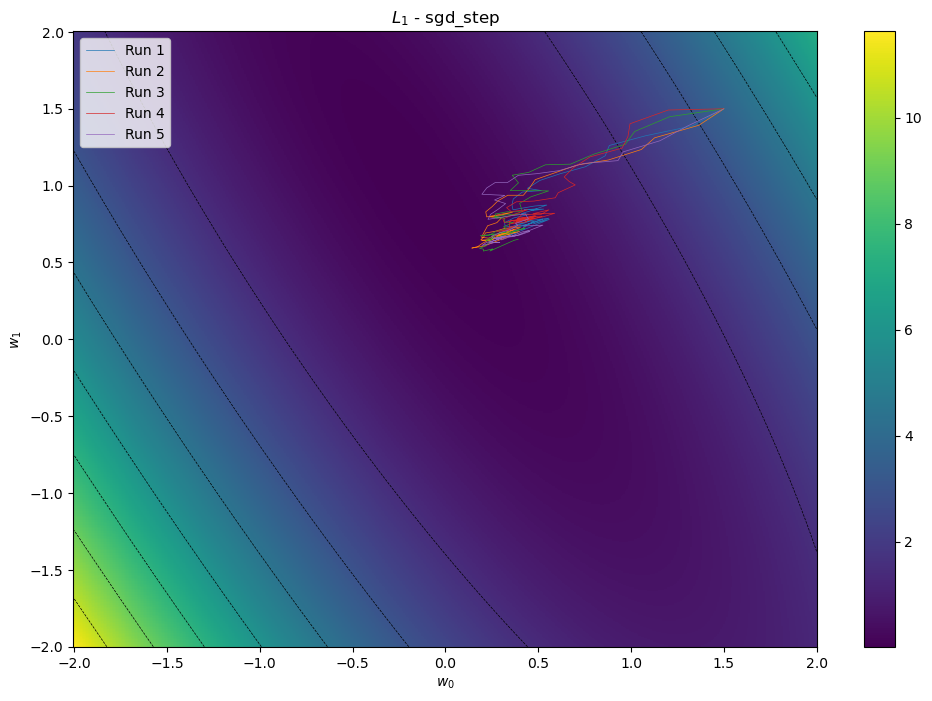

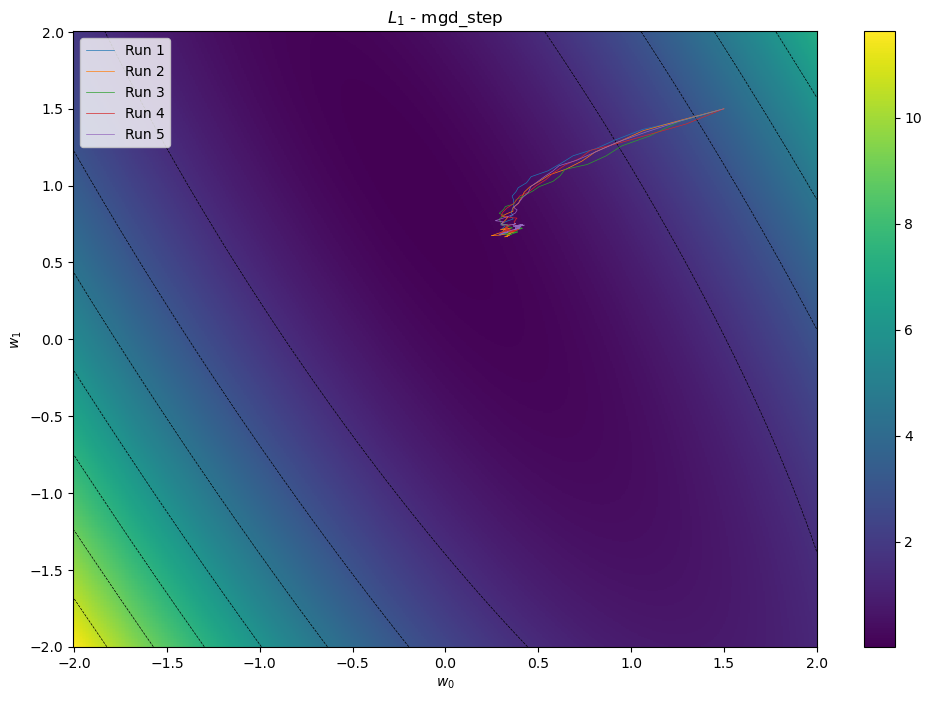

In [8]:
for optimizer_step in (gd_step, sgd_step, mgd_step):
    _ = optimize_and_plot(loss_number=1, optimizer_step=optimizer_step, n_runs=5)[:, -1, :]

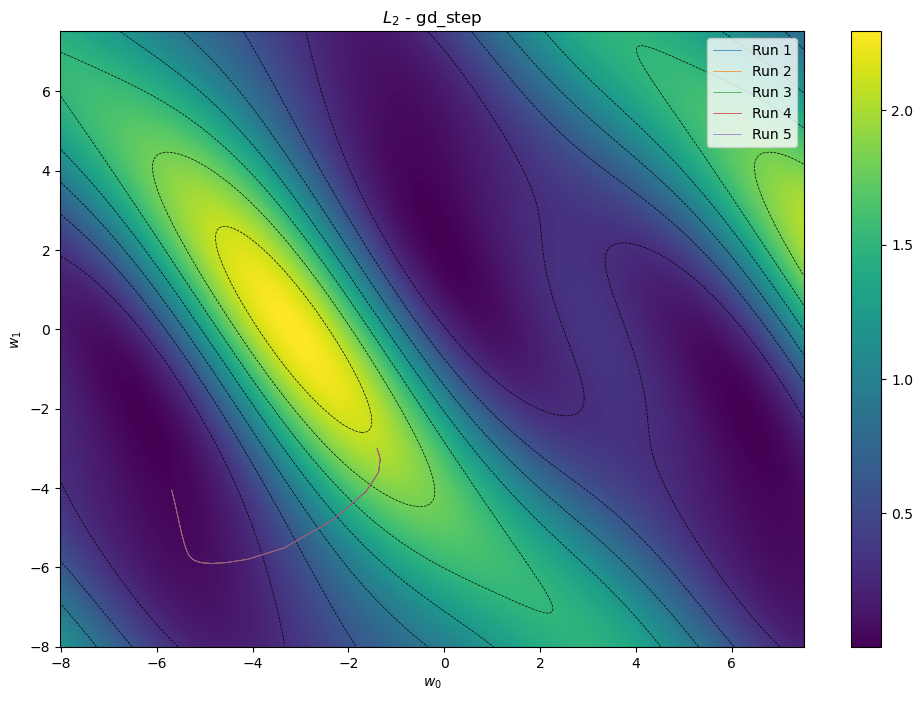

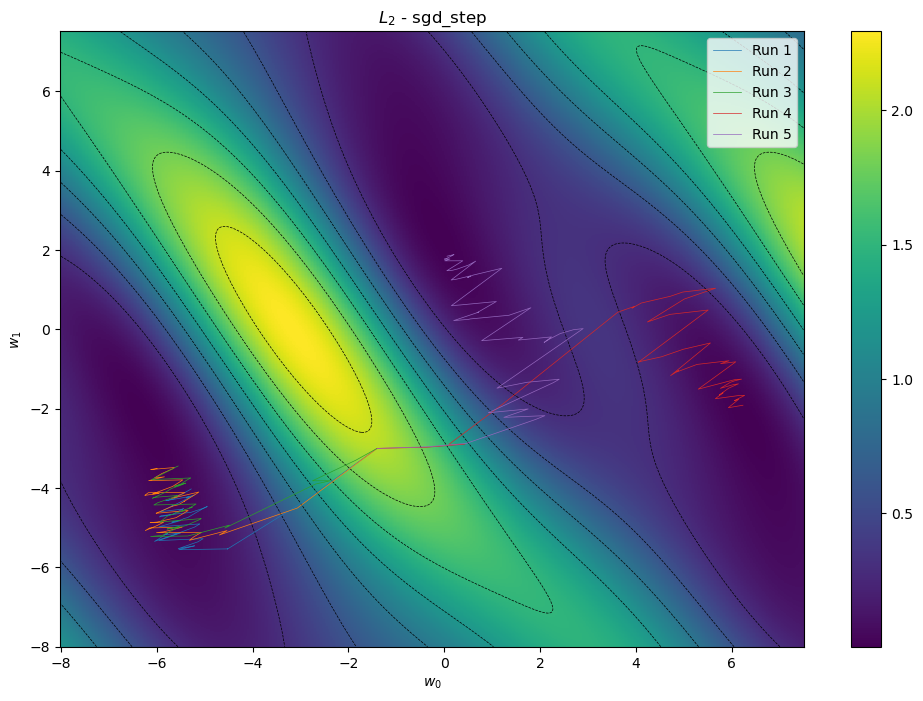

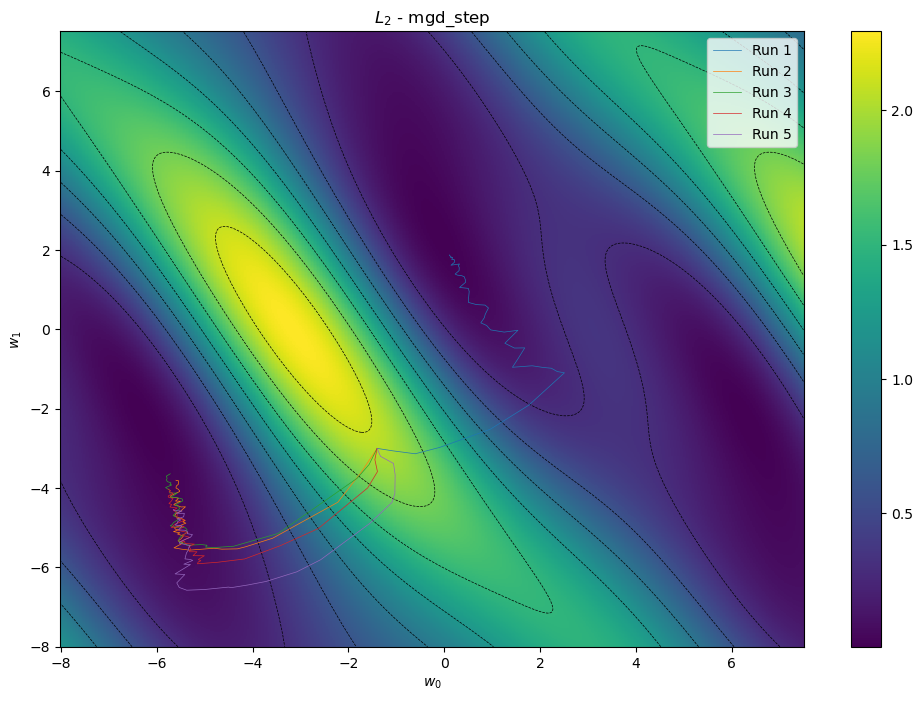

In [9]:
for optimizer_step in (gd_step, sgd_step, mgd_step):
    _ = optimize_and_plot(loss_number=2, optimizer_step=optimizer_step, n_runs=5)[:, -1, :]